In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
asthma_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Models/Asthma Prediction /asthma_disease_data.csv')

In [3]:
asthma_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
asthma_data.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid
2391,7425,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,...,2.280613,2.453284,1,1,0,0,1,0,0,Dr_Confid


In [5]:
asthma_data.shape

(2392, 29)

In [6]:
asthma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [7]:
asthma_data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


In [8]:
asthma_data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
asthma_data = asthma_data.drop(columns=['DoctorInCharge','PatientID','EducationLevel'], axis=1)

In [10]:
correlation = asthma_data.corr()

<Axes: >

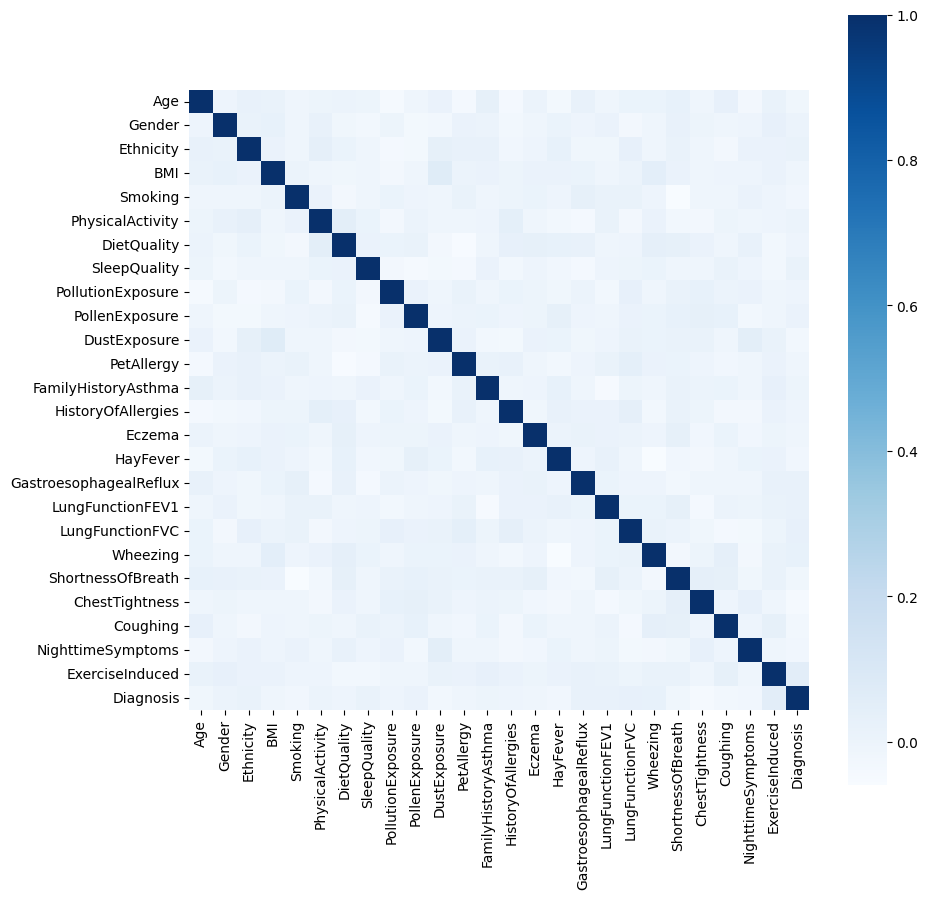

In [11]:
# Making a heat map
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=False, annot_kws={'size':8}, cmap='Blues')

In [12]:
asthma_data.head()

,Age,Gender,Ethnicity,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,...,0,3.470589,3.067944,1,1,1,0,0,1,0


In [13]:
asthma_data['Gender'].value_counts()

,count
Gender,
0,1212
1,1180


In [14]:
asthma_data['Smoking'].value_counts()

,count
Smoking,
0,2053
1,339


In [15]:
asthma_data['Diagnosis'].value_counts()

,count
Diagnosis,
0,2268
1,124


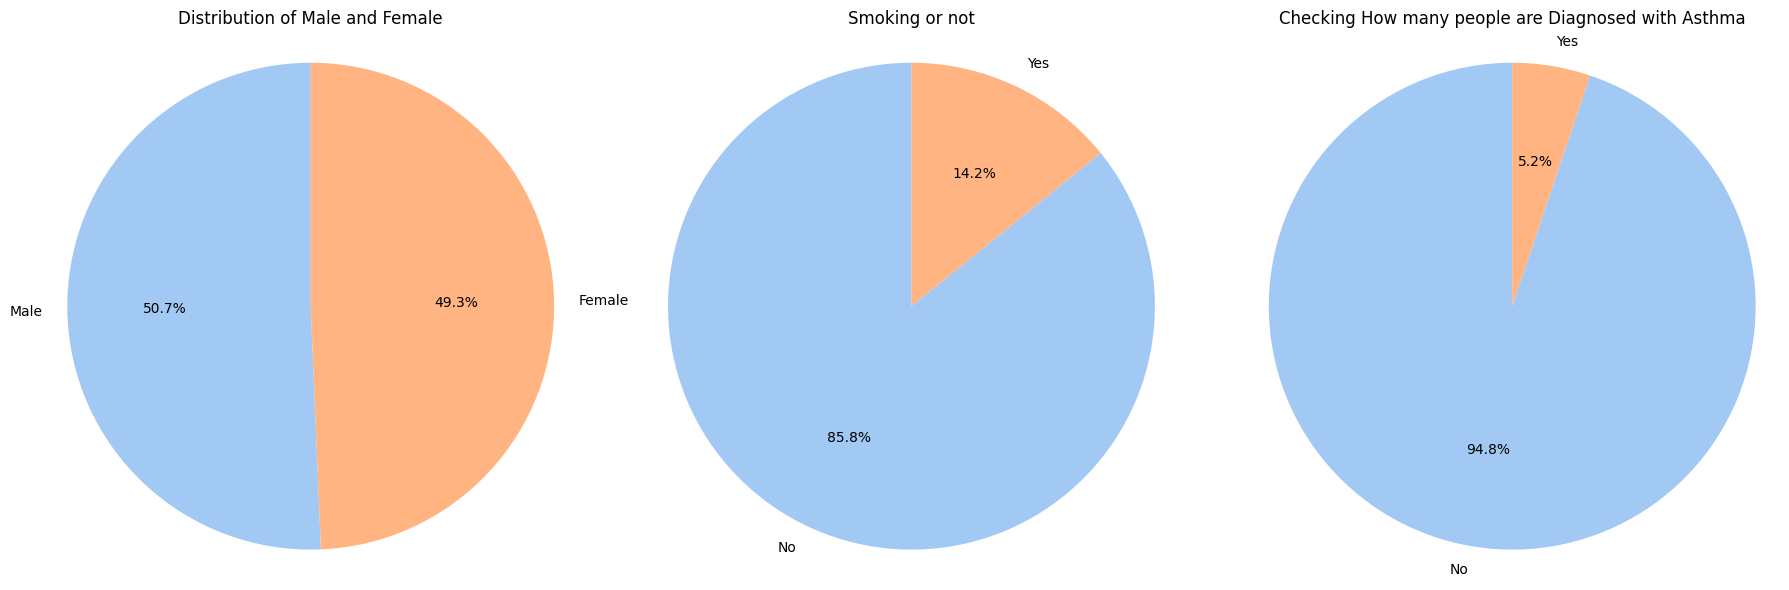

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

Sex_counts = asthma_data['Gender'].value_counts()
axes[0].pie(Sex_counts, labels=['Male', 'Female'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Distribution of Male and Female')

Survived_counts = asthma_data['Smoking'].value_counts()
axes[1].pie(Survived_counts, labels=['No', 'Yes'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].axis('equal')
axes[1].set_title('Smoking or not')

region_counts = asthma_data['Diagnosis'].value_counts()
axes[2].pie(region_counts, labels=['No','Yes'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[2].axis('equal')
axes[2].set_title('Checking How many people are Diagnosed with Asthma')

# Show the pie charts
plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x7cff38705f60>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

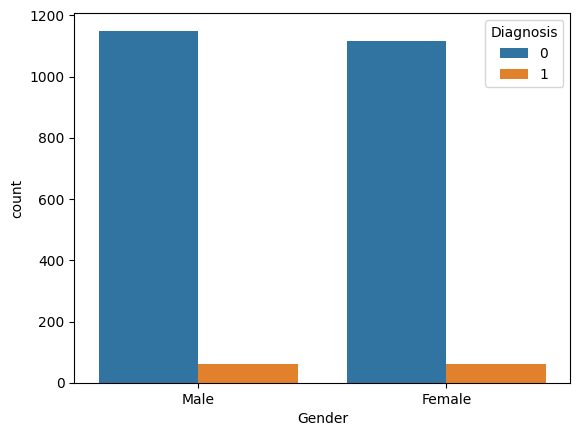

In [17]:
# Comparing How many Male population have Ashtma and how many female population have asthma
sns.countplot(x='Gender', hue='Diagnosis', data=asthma_data)
plt.xticks([0, 1], ['Male', 'Female'])  # Assuming 0 and 1 represent Male and Female

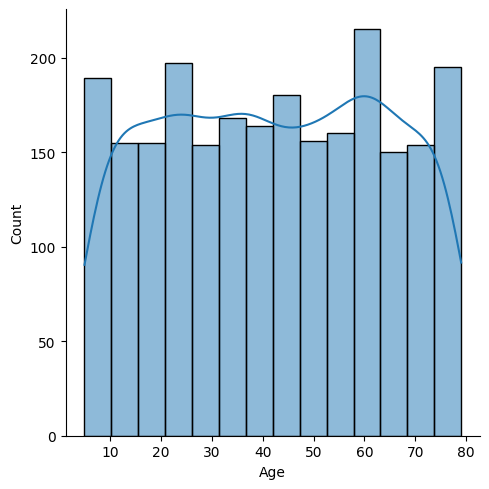

In [18]:
sns.displot(asthma_data['Age'], kde=True)

In [19]:
X = asthma_data.drop(columns='Diagnosis', axis=1)
Y = asthma_data['Diagnosis']

In [20]:
# Splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(2392, 25) (1913, 25) (479, 25)


In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Checing accuracy on training data
training_data_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(training_data_prediction, Y_train)

print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9482488238369053


In [25]:
# checking accuracy on Testing data
testing_data_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(testing_data_prediction, Y_test)

print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.9478079331941545


In [26]:
import pickle

filename = 'asthma_model.sav'
pickle.dump(model, open(filename, 'wb'))